# Problem Statement: 

Concrete Strength Prediction

# Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.


# Attribute Information:

# Steps and Tasks:

## 1. Exploratory Data Quality Report :

- Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)


- Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)


- Feature Engineering techniques(10 marks)
    
    - Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
    
    - Get the data model ready and do a train test split.
    
    - Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

## 2. Creating the Model and Tuning It:

- Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)


- Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)


---

# 1. Import Libraries & Load Dataset

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
data = pd.read_csv('concrete.csv')

In [4]:
# shape of dataset
data.shape

(1030, 9)

> The dataset has 1030 rows and 9 columns.

In [5]:
# View first 5 rows of dataset
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


> 'strength' is the Target variable

# 2. Data Analysis & Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


> All the columns are 'float64' data type except age which is 'int64'
- The Dtype for all columns is either float or int type, which means that they are all digits/numeric values i.e. there are no wrong imputations or unwanted string values in the dataset.

In [7]:
# Check missing values 
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

> There are no missing values in the dataset. 

In [8]:
# Statistical Summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


> Observations:
- The minimum and 25% values are 0 in 'slag', 'ash', 'superplastic'.
- 'age' seems to be skewed distribution. 
- Given that the 'age' can have values between 1-365, it can be observed that the min. value for 'age' is 1 and max. value for 'age' is 365, hence the 'age' values are within range.
- The minimum values for all columns are positive, i.e. there are no negative values in the dataset. 

In [9]:
# Check unique values
data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

> There are no categorical columns.

In [11]:
# Pandas Profiling
import pandas_profiling
pandas_profiling.ProfileReport(data).to_file("output.html")

## a. Univariate Analysis:

In [6]:
# Names of columns of daatset
cols = data.columns
print(cols)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [11]:
# Check value counts for all columns/attributes
for i in cols:
    print(data[i].value_counts())
    print(" ")

425.0    20
362.6    20
251.4    15
446.0    14
310.0    14
         ..
312.9     1
261.9     1
325.6     1
143.8     1
145.4     1
Name: cement, Length: 278, dtype: int64
 
0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64
 
0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64
 
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
165.0      1
237.0      1
166.7      1
191.3      1
184.4      1
Name: water, Length: 195, dtype: int64
 
0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
2.2       1
11.5      1
6.3       1
10.5      1
9.8       1
Name: superplastic, Length: 111, dtype: int64
 
932.0     57
852.1     45
944.7     30
968.0     29
1125.0    24
          ..
909.7      1
925.3 

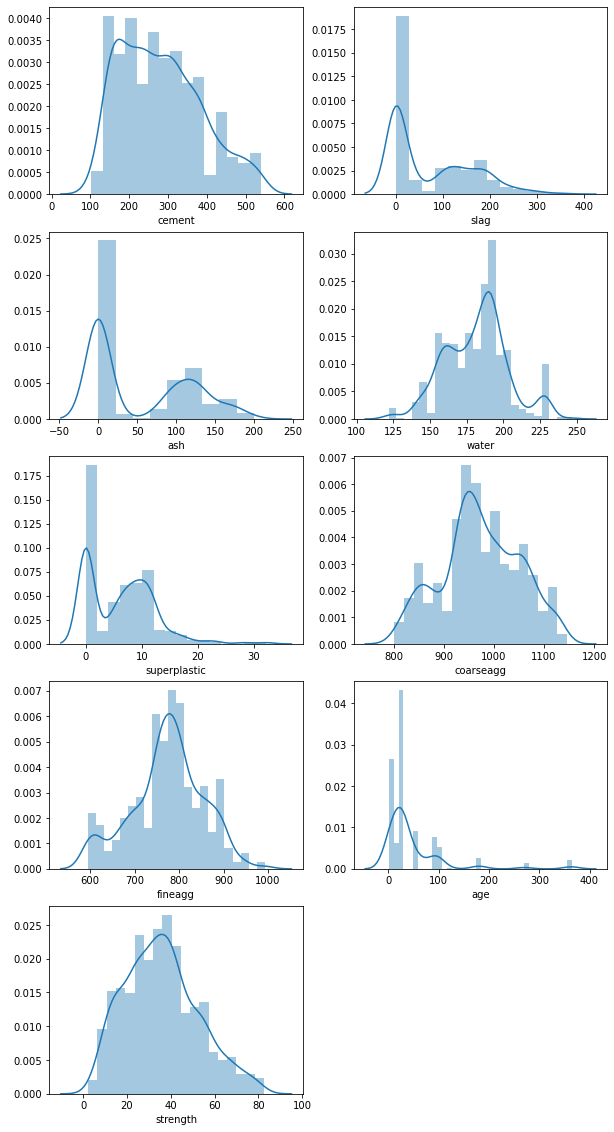

In [12]:
# Plot all the attributes
plt.figure(figsize= (10,20))
pos = 1
for i in cols:
    plt.subplot(5,2, pos)
    sns.distplot(data[i]);
    pos += 1    

In [13]:
# skewed distribution
data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

> 'age' is right-skewed distribution.

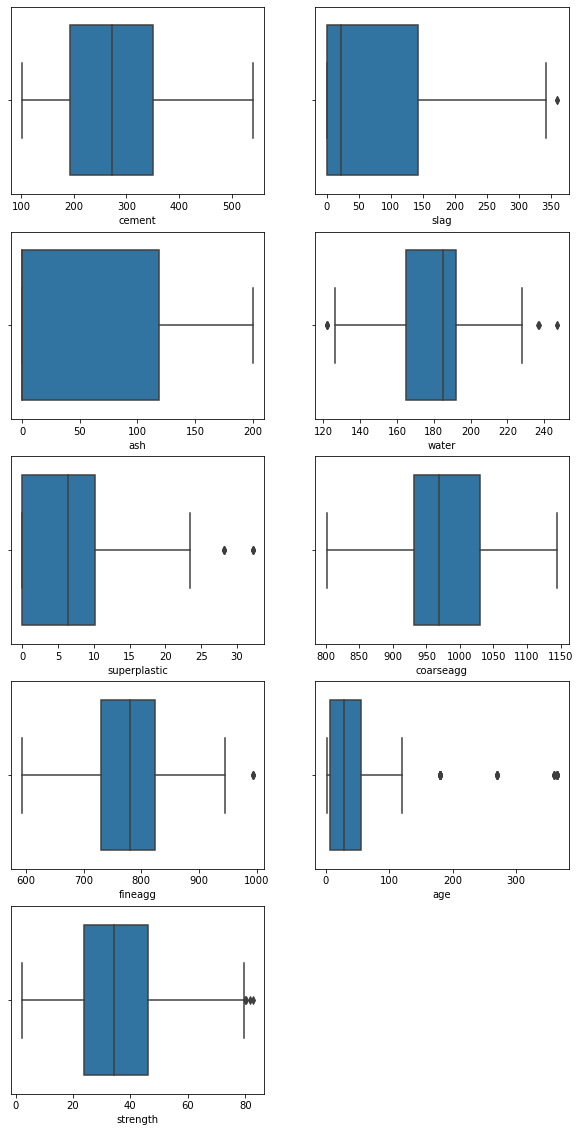

In [14]:
# check Outliers using boxplots
plt.figure(figsize= (10,20))
pos = 1
for i in cols:
    plt.subplot(5,2, pos)
    sns.boxplot(data[i]);
    pos += 1   

> 'age' has outliers but we ignore that because we dont want to lose information.

In [4]:
# Duplicates
data[data.duplicated()==True]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [5]:
# Drop duplicates
data.drop_duplicates(inplace = True)

In [6]:
# Check duplicates again
data[data.duplicated()==True]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


## b. Bivariate Analysis:

In [10]:
# Correlation
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


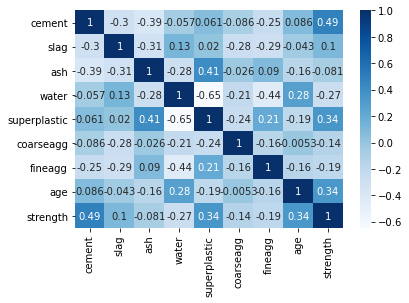

In [19]:
# Heatmap for correlation
sns.heatmap(data.corr(), cmap = 'Blues', annot = True);

> Observations:
- Features that are highly positively correlated to 'strength' are: 'cement', 'superplastic' and 'age'.
    - Strength increases as the amount of Cement (Kg) as well as age (days) increases. <br>
- Features that are highly negatively correlated to 'strength' are: 'water'.
    - Strength decreases as the amount of water (Kg) increases.

In [7]:
## Adding a new column 'water- cement ratio'

# Since the 'strength' increases with increase in amount of 'cement' 
# and decrease in amount of 'water'. we can add a column describing 
# 'water-cement ratio'. ('strength' has direct relationship with 'cement' 
# and inverse relationship with 'water', so we use the ratio of the two
# features to get the desired impact on 'strength')

data['water-cement ratio'] = data['water'] / data['cement']


In [8]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water-cement ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708


In [9]:
data['water-cement ratio'].describe()

count    1005.000000
mean        0.756220
std         0.313524
min         0.266893
25%         0.547465
50%         0.689531
75%         0.937241
max         1.882353
Name: water-cement ratio, dtype: float64

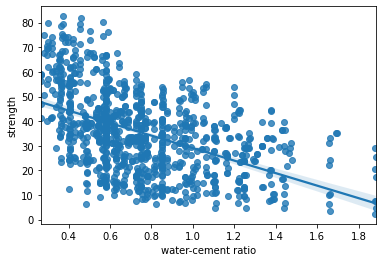

In [10]:
sns.regplot(x =data['water-cement ratio'], y =data['strength']);

> As the 'water-cement ratio' decreases, the 'strength' increases. Hence, the strength is higher for lower water-cement ratios.

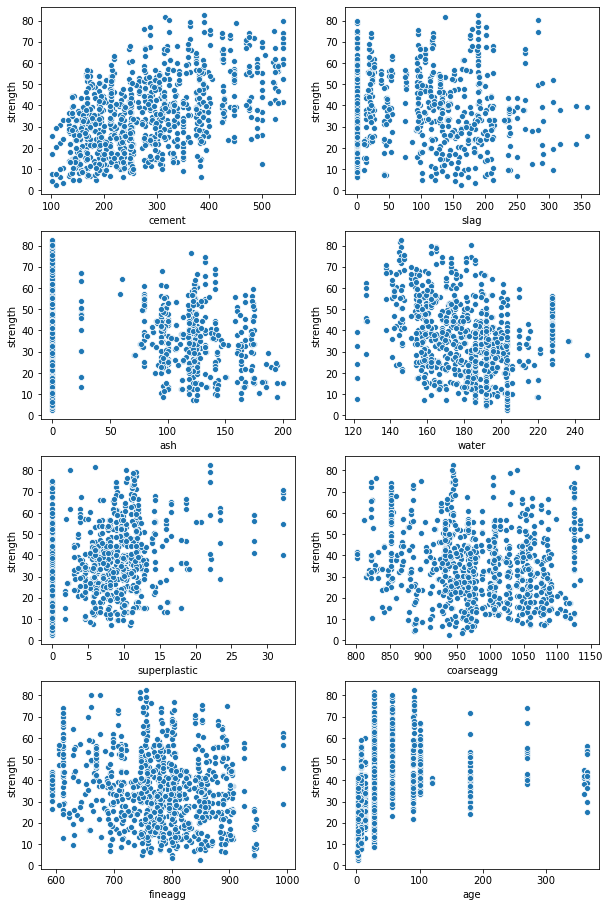

In [21]:
# Plot relationship (scatterplot) of other attributes with Target variable
col_x = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']
plt.figure(figsize= (10,20))
pos = 1
for i in col_x:
    plt.subplot(5,2, pos)
    sns.scatterplot(x =data[i], y =data['strength']);
    pos += 1

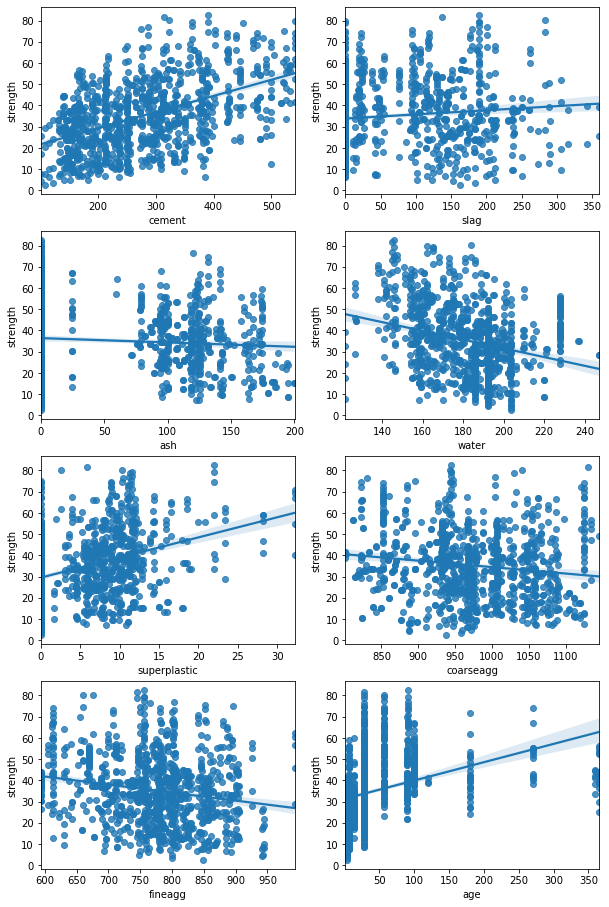

In [24]:
# Plot relationship (regline plot) of other attributes with Target variable

plt.figure(figsize= (10,20))
pos = 1
for i in col_x:
    plt.subplot(5,2, pos)
    sns.regplot(x =data[i], y =data['strength']);
    pos += 1

> Observations:
- Scatterplot between 'cement' and 'Strength' show that as the amount of cement inscreases, the strength also increases
- Similary, increase in 'superplastic' and 'age' increases the strength. - However, the regression line plot between 'water' and 'strength' is sloping downwards, i.e. increase in water decreases the strength. 

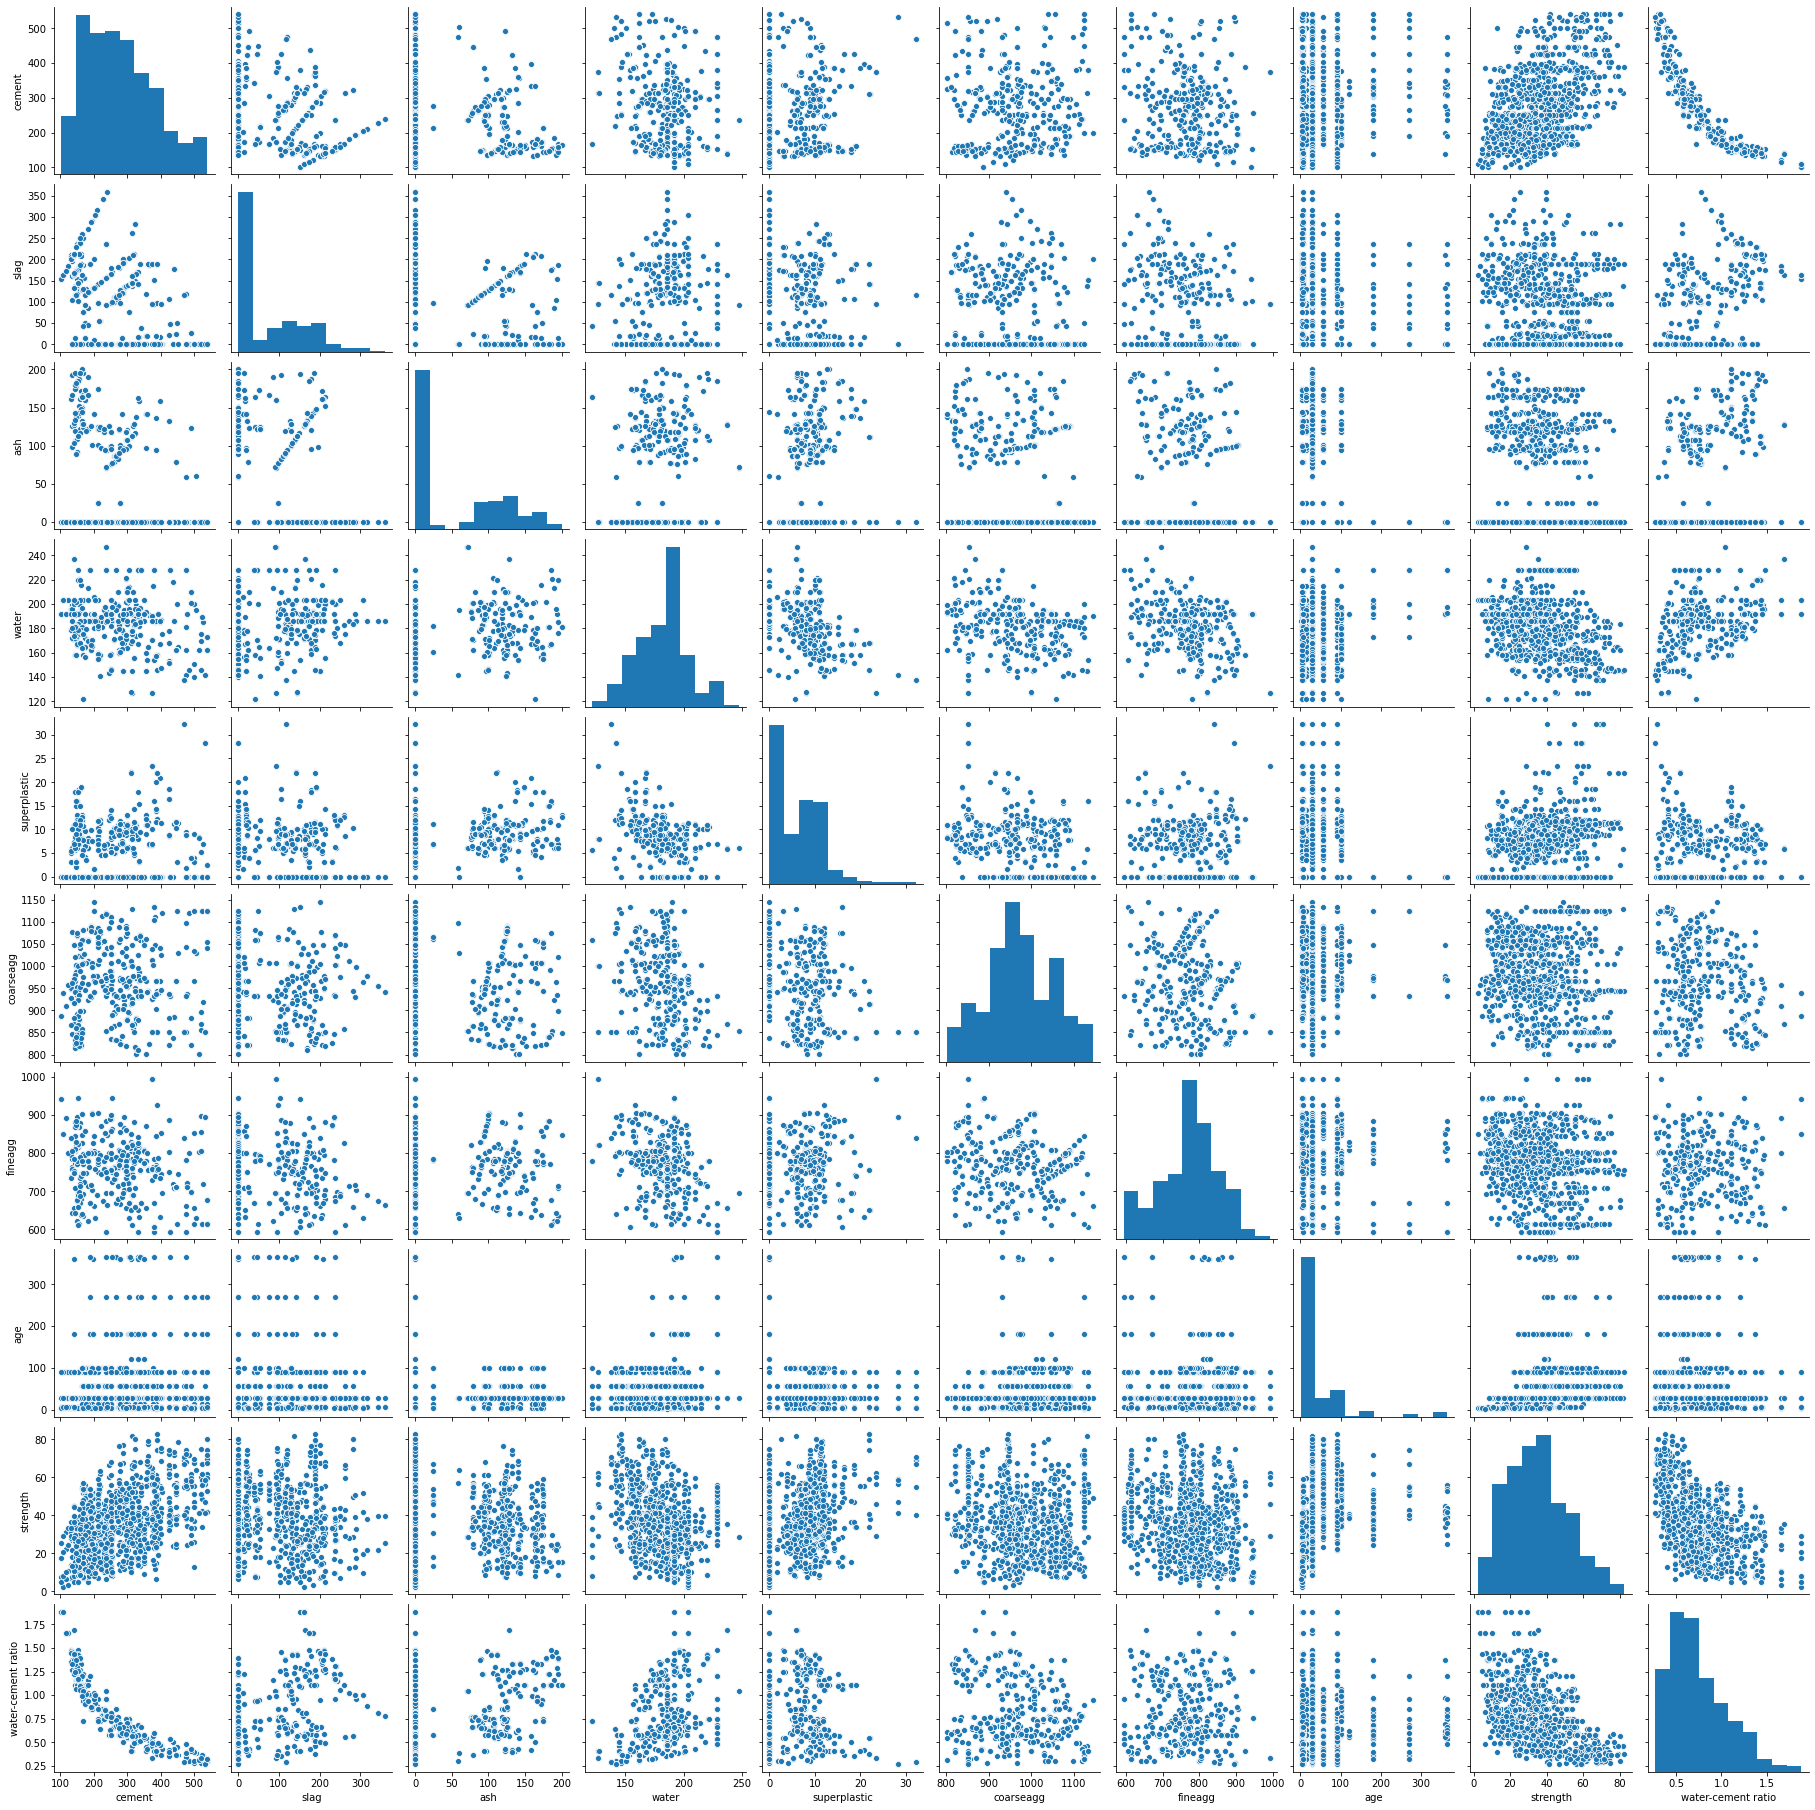

In [11]:
sns.pairplot(data);

# 3. Model Training

## Prepare data

In [13]:
cols_to_drop = ['strength','water', 'cement']
x = data.drop(cols_to_drop , axis = 1)
y = data['strength'].values
y = y.reshape(-1,1)

In [14]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [15]:
x_train.shape

(703, 7)

In [16]:
x_test.shape

(302, 7)

In [17]:
y_train.shape

(703, 1)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [21]:
# k-fold cross validation
from sklearn.model_selection import KFold
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds,
              random_state=seed)

##  Fit Regression Models

### a. Model 1  (Linear Regression) 

In [22]:
## Model 1: Linear Regression

# Step 1: Fit Model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred1 = sc_y.inverse_transform(model1.predict(x_test))

# Step 3: Evaluate R squared Score
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred1)

# Step 4: Print Coefficients & intercept of the model
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[0][idx]))

intercept1 = model1.intercept_[0]
print("\nThe intercept for model is {}".format(intercept1))
    
# Step 5: Print train/test Scores and R2 score
train1 = model1.score(x_train, y_train)
test1 = model1.score(x_test, sc_y.transform(y_test))
print("\nTraining Accuracy: {}".format(train1))
print("\nTesting Accuracy: {}".format(test1))
print("\nR2 score: {}".format(score1))

# Step 6: Evaluate & print Cross-Validation Score Mean and Standard Deviation
from sklearn.model_selection import cross_val_score
kfold1 = cross_val_score(model1, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold1))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold1.mean()*100.0, kfold1.std()*100.0))

The coefficient for slag is 0.38412212646467836
The coefficient for ash is 0.14480328469322828
The coefficient for superplastic is 0.24359374408158263
The coefficient for coarseagg is -0.018180747296704658
The coefficient for fineagg is -0.01614710590818147
The coefficient for age is 0.3967967784400632
The coefficient for water-cement ratio is -0.6070014268186155

The intercept for model is 5.711620996900329e-16

Training Accuracy: 0.5518810788924927

Testing Accuracy: 0.5427047310699877

R2 score: 0.5427047310699877

Estimated Accuracy mean: 43.723% 
Estimated Accuracy Standard Deviation: 24.452%


In [23]:
## Model 1: (Regularization) RIDGE Linear Regression Model

# Step 1: Fit Model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.3)
ridge.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred1_r = sc_y.inverse_transform(ridge.predict(x_test))

# Step 3: Evaluate R squared Score
score1_r = r2_score(y_test, y_pred1_r)

# Step 4: Print Coefficients of the model
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))
    
# Step 5: Print train/test Scores and R2 score
train1_r = ridge.score(x_train, y_train)
test1_r = ridge.score(x_test, sc_y.transform(y_test))
print("\nTraining Accuracy: {}".format(train1_r))
print("\nTesting Accuracy: {}".format(test1_r))
print("\nR2 score: {}".format(score1_r))

# Step 6: Evaluate & print Cross-Validation Score Mean and Standard Deviation
from sklearn.model_selection import cross_val_score
kfold1_r = cross_val_score(ridge, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold1))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold1_r.mean()*100.0, kfold1_r.std()*100.0))

The coefficient for slag is 0.38319175794566157
The coefficient for ash is 0.1440929992434946
The coefficient for superplastic is 0.24396986169505666
The coefficient for coarseagg is -0.018357606724377695
The coefficient for fineagg is -0.01656875388826317
The coefficient for age is 0.3965030837598694
The coefficient for water-cement ratio is -0.60613439603765

Training Accuracy: 0.551880652640512

Testing Accuracy: 0.5426755991073263

R2 score: 0.5426755991073262

Estimated Accuracy mean: 43.729% 
Estimated Accuracy Standard Deviation: 24.428%


In [24]:
## Model 1: (Regularization) LASSO Linear Regression Model

# Step 1: Fit Model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred1_l = sc_y.inverse_transform(lasso.predict(x_test))

# Step 3: Evaluate R squared Score
score1_l = r2_score(y_test, y_pred1_l)

# Step 4: Print Coefficients of the model
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))
    
# Step 5: Print train/test Scores and R2 score
train1_l = lasso.score(x_train, y_train)
test1_l = lasso.score(x_test, sc_y.transform(y_test))
score1_l = r2_score(y_test, y_pred1_l)
print("\nTraining Accuracy: {}".format(train1_l))
print("\nTesting Accuracy: {}".format(test1_l))
print("\nR2 score: {}".format(score1_l))

# Step 6: Evaluate & print Cross-Validation Score Mean and Standard Deviation
from sklearn.model_selection import cross_val_score
kfold1_l = cross_val_score(lasso, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold1))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold1_l.mean()*100.0, kfold1_l.std()*100.0))

The coefficient for slag is 0.15714333743161524
The coefficient for ash is 0.0
The coefficient for superplastic is 0.2292898150532964
The coefficient for coarseagg is -0.0
The coefficient for fineagg is -0.006066850989267116
The coefficient for age is 0.2716635099286469
The coefficient for water-cement ratio is -0.39494477111680054

Training Accuracy: 0.49016636789138324

Testing Accuracy: 0.4744654232635934

R2 score: 0.4744654232635933

Estimated Accuracy mean: 38.402% 
Estimated Accuracy Standard Deviation: 17.815%


### a. Model 2  (Polynomial Regression) 

In [25]:
# Model 2: Polynomial Regression

# Step 1: Fit Model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

model2 = LinearRegression()
model2.fit(x_train_poly, y_train)

# Step 2: Predict test set results
y_pred2 = sc_y.inverse_transform(model2.predict(x_test_poly))

# Step 3: Evaluate R squared Score
score2 = r2_score(y_test, y_pred2)

# Step 4: Print Coefficients & intercept of the model
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, model2.coef_[0][idx]))

intercept2 = model2.intercept_[0]
print("\nThe intercept for model is {}".format(intercept2))
    
# Step 5: Print train/test Scores and R2 score
train2 = model2.score(x_train_poly, y_train)
test2 = model2.score(x_test_poly, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train2))
print("Testing set Accuracy: {}".format(test2))
print("R squared: {}".format(score2))

# Step 6: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold2 = cross_val_score(model2, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold2))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold2.mean()*100.0, kfold2.std()*100.0))

The coefficient for slag is -3.641012396420321e-15
The coefficient for ash is 0.5664012512712784
The coefficient for superplastic is 0.383529746934576
The coefficient for coarseagg is 0.07105979309819632
The coefficient for fineagg is 0.05047139916008149
The coefficient for age is -0.006541837932979855
The coefficient for water-cement ratio is 1.349863754273665

The intercept for model is 0.2003916097070016
Training set Accuracy: 0.9078075055558614
Testing set Accuracy: 0.7881353659975275
R squared: 0.7881353659975275

Estimated Accuracy mean: 43.723% 
Estimated Accuracy Standard Deviation: 24.452%


In [26]:
## Model 2: (Regularization) RIDGE Polynomial Regression Model

# Step 1: Fit Model
from sklearn.linear_model import Ridge
ridge_poly = Ridge(alpha = 0.3)
ridge_poly.fit(x_train_poly, y_train)

# Step 2: Predict test set results
y_pred2_r_poly = sc_y.inverse_transform(ridge_poly.predict(x_test_poly))

# Step 3: Evaluate R squared Score
score2_r_poly = r2_score(y_test, y_pred2_r_poly)

# Step 4: Print Coefficients of the model
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_poly.coef_[0][idx]))
    
# Step 5: Print train/test Scores and R2 score
train2_r_poly = ridge_poly.score(x_train_poly, y_train)
test2_r_poly = ridge_poly.score(x_test_poly, sc_y.transform(y_test))
print("\nTraining Accuracy: {}".format(train2_r_poly))
print("\nTesting Accuracy: {}".format(test2_r_poly))
print("\nR2 score: {}".format(score2_r_poly))

# Step 6: Evaluate & print Cross-Validation Score Mean and Standard Deviation
from sklearn.model_selection import cross_val_score
kfold2_r_poly = cross_val_score(ridge_poly, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold1))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold2_r_poly.mean()*100.0, kfold2_r_poly.std()*100.0))

The coefficient for slag is 0.0
The coefficient for ash is 0.5104039635954356
The coefficient for superplastic is 0.31262468314861447
The coefficient for coarseagg is 0.06751479406596221
The coefficient for fineagg is 0.051227119447104175
The coefficient for age is -0.03983464380198986
The coefficient for water-cement ratio is 1.2998350971916397

Training Accuracy: 0.9068954891647935

Testing Accuracy: 0.8129088985175582

R2 score: 0.8129088985175581

Estimated Accuracy mean: 43.729% 
Estimated Accuracy Standard Deviation: 24.428%


In [27]:
## Model 2: (Regularization) LASSO Polynomial Regression Model

# Step 1: Fit Model
from sklearn.linear_model import Lasso
lasso_poly = Lasso(alpha = 0.1)
lasso_poly.fit(x_train_poly, y_train)

# Step 2: Predict test set results
y_pred2_l_poly = sc_y.inverse_transform(lasso_poly.predict(x_test_poly))

# Step 3: Evaluate R squared Score
score2_l_poly = r2_score(y_test, y_pred2_l_poly)

# Step 4: Print Coefficients of the model
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, lasso_poly.coef_[idx]))
    
# Step 5: Print train/test Scores and R2 score
train2_l_poly = lasso_poly.score(x_train_poly, y_train)
test2_l_poly = lasso_poly.score(x_test_poly, sc_y.transform(y_test))
print("\nTraining Accuracy: {}".format(train2_l_poly))
print("\nTesting Accuracy: {}".format(test2_l_poly))
print("\nR2 score: {}".format(score2_l_poly))

# Step 6: Evaluate & print Cross-Validation Score Mean and Standard Deviation
from sklearn.model_selection import cross_val_score
kfold2_l_poly = cross_val_score(lasso_poly, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold1))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold2_l_poly.mean()*100.0, kfold2_l_poly.std()*100.0))

The coefficient for slag is 0.0
The coefficient for ash is 0.04785528998923697
The coefficient for superplastic is 0.0
The coefficient for coarseagg is 0.18142326536741685
The coefficient for fineagg is -0.0
The coefficient for age is -0.0
The coefficient for water-cement ratio is 0.17789255998667997

Training Accuracy: 0.5871662611058435

Testing Accuracy: 0.547020829406211

R2 score: 0.5470208294062109

Estimated Accuracy mean: 38.402% 
Estimated Accuracy Standard Deviation: 17.815%


### c. Comparing Linear and Polynomial Regression 

In [28]:
# Create Multi-Index
arrays = [['Linear Regression', 'Polynomial Regression', 
           'Linear Regression', 'Polynomial Regression', 
           'Linear Regression', 'Polynomial Regression'],
          ['No Reg.','No Reg.', 'RIDGE','RIDGE', 'LASSO', 'LASSO' ]]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names = ['Models', 'Regularization'])

# Create dataframe to compare scores
df = pd.DataFrame({'Training Accuracy': [train1, train2, train1_r, 
                                                train2_r_poly,train1_l, 
                                                train2_l_poly],
                   'Testing Accuracy': [test1, test2, test1_r, 
                                        test2_r_poly, test1_l, 
                                        test2_l_poly],
                   'R2 score': [score1, score2, score1_r,
                                score2_r_poly, score1_l, 
                                score2_l_poly ]},
                    index = index)

# View Dataframe
df.sort_index()

Training Accuracy  Testing Accuracy  \
Models                Regularization                                        
Linear Regression     LASSO                    0.490166          0.474465   
                      No Reg.                  0.551881          0.542705   
                      RIDGE                    0.551881          0.542676   
Polynomial Regression LASSO                    0.587166          0.547021   
                      No Reg.                  0.907808          0.788135   
                      RIDGE                    0.906895          0.812909   

                                      R2 score  
Models                Regularization            
Linear Regression     LASSO           0.474465  
                      No Reg.         0.542705  
                      RIDGE           0.542676  
Polynomial Regression LASSO           0.547021  
                      No Reg.         0.788135  
                      RIDGE           0.812909

> Highest R2 score for Polynomial Regression (Ridge) but there is overfit.

### d. Model 3 (Decision Tree)

In [29]:
## Model 3: Decision Tree

# Step 1: Fit Model
from sklearn.tree import DecisionTreeRegressor
model3_dTree = DecisionTreeRegressor(random_state = 0)
model3_dTree.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred3_dTree = sc_y.inverse_transform(model3_dTree.predict(x_test))

# Step 3: Evaluate R squared Score
score3 = r2_score(y_test, y_pred3_dTree)

# Step 4: Print train/test Scores and R2 score
train3 = model3_dTree.score(x_train, y_train)
test3 = model3_dTree.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train3))
print("\nTesting set Accuracy: {}".format(test3))
print("\nR squared: {}".format(score3))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold3 = cross_val_score(model3_dTree, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold3))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold3.mean()*100.0, kfold3.std()*100.0))

Training set Accuracy: 0.9960646358365961

Testing set Accuracy: 0.8197472832390005

R squared: 0.8197472832390005

Estimated Accuracy mean: 75.427% 
Estimated Accuracy Standard Deviation: 19.049%


In [30]:
# Hyper-parameters of Decision Tree Model 3
model3_dTree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [31]:
## Model 3: (Pruning) Decision Tree

# Step 1: Fit Model
from sklearn.tree import DecisionTreeRegressor
model3_dTree_p = DecisionTreeRegressor(random_state = 0,
                                      max_depth = 15)
model3_dTree_p.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred3_dTree_p = sc_y.inverse_transform(model3_dTree_p.predict(x_test))

# Step 3: Evaluate R squared Score
score3_p = r2_score(y_test, y_pred3_dTree_p)

# Step 4: Print train/test Scores and R2 score
train3_p = model3_dTree_p.score(x_train, y_train)
test3_p = model3_dTree_p.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train3_p))
print("\nTesting set Accuracy: {}".format(test3_p))
print("\nR squared: {}".format(score3_p))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold3_p = cross_val_score(model3_dTree_p, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold3))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold3_p.mean()*100.0, kfold3_p.std()*100.0))

Training set Accuracy: 0.9960167993334241

Testing set Accuracy: 0.8308515462024044

R squared: 0.8308515462024043

Estimated Accuracy mean: 76.282% 
Estimated Accuracy Standard Deviation: 16.740%


### d. Model 4 (Ensemble: Random Forest)

In [32]:
## Model 4: (Ensemble) Random Forest

# Step 1: Fit Model
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(random_state = 0)
model4.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred4 = sc_y.inverse_transform(model4.predict(x_test))

# Step 3: Evaluate R squared Score
score4 = r2_score(y_test, y_pred4)

# Step 4: Print train/test Scores and R2 score
train4 = model4.score(x_train, y_train)
test4 = model4.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train4))
print("Testing set Accuracy: {}".format(test4))
print("R squared: {}".format(score4))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold4 = cross_val_score(model4, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold4))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold4.mean()*100.0, kfold4.std()*100.0))


Training set Accuracy: 0.9840158912474042
Testing set Accuracy: 0.9046328884804871
R squared: 0.9046328884804871

Estimated Accuracy mean: 87.838% 
Estimated Accuracy Standard Deviation: 8.971%


### e. Model 5 (Ensemble: Bagging)

In [33]:
## Model 5 : (Ensemble) Bagging 

# Step 1: Fit Model
from sklearn.ensemble import BaggingRegressor
model5  = BaggingRegressor(n_estimators = 100,
                            base_estimator = model3_dTree_p,
                            random_state = 0)
model5.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred5 = sc_y.inverse_transform(model5.predict(x_test))

# Step 3: Evaluate R squared Score
score5 = r2_score(y_test, y_pred5)

# Step 4: Print train/test Scores and R2 score
train5 = model5.score(x_train, y_train)
test5 = model5.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train5))
print("Testing set Accuracy: {}".format(test5))
print("R squared: {}".format(score5))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold5 = cross_val_score(model5, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold5))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold5.mean()*100.0, kfold5.std()*100.0))


Training set Accuracy: 0.9837926798024362
Testing set Accuracy: 0.9044815183118835
R squared: 0.9044815183118835

Estimated Accuracy mean: 87.871% 
Estimated Accuracy Standard Deviation: 8.944%


### f. Model 6 (Ensemble: AdaBoosting)

In [34]:
## Model 6: (Ensemble) AdaBoosting

# Step 1: Fit Model
from sklearn.ensemble import AdaBoostRegressor
model6  = AdaBoostRegressor(n_estimators = 100,
                            base_estimator = model3_dTree,
                            random_state = 0)
model6.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred6 = sc_y.inverse_transform(model6.predict(x_test))

# Step 3: Evaluate R squared Score
score6 = r2_score(y_test, y_pred6)

# Step 4: Print train/test Scores and R2 score
train6 = model6.score(x_train, y_train)
test6 = model6.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train6))
print("Testing set Accuracy: {}".format(test6))
print("R squared: {}".format(score6))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold6 = cross_val_score(model6, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold6))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold6.mean()*100.0, kfold6.std()*100.0))


Training set Accuracy: 0.951572049297383
Testing set Accuracy: 0.8627975874161222
R squared: 0.8627975874161222

Estimated Accuracy mean: 83.188% 
Estimated Accuracy Standard Deviation: 11.656%


### g. Model 7 (Ensemble: Gradient Boosting)

In [35]:
## Model 7: (Ensemble)  Gradient Boosting

# Step 1: Fit Model
from sklearn.ensemble import GradientBoostingRegressor
model7  = GradientBoostingRegressor(n_estimators = 100,
                                    random_state = 0)
model7.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred7 = sc_y.inverse_transform(model7.predict(x_test))

# Step 3: Evaluate R squared Score
score7 = r2_score(y_test, y_pred7)

# Step 4: Print train/test Scores and R2 score
train7 = model7.score(x_train, y_train)
test7 = model7.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train7))
print("Testing set Accuracy: {}".format(test7))
print("R squared: {}".format(score7))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold7 = cross_val_score(model7, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold7))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold7.mean()*100.0, kfold7.std()*100.0))


Training set Accuracy: 0.9466643599100429
Testing set Accuracy: 0.8897624132098613
R squared: 0.8897624132098613

Estimated Accuracy mean: 87.239% 
Estimated Accuracy Standard Deviation: 7.122%


### i.  Comparison of all models

In [36]:
# Print evaluation metrics of all models
df = pd.DataFrame({'Models': ['Linear Regression',
                             'Polynomial Regression (RIDGE)',
                              'Decision Tree (Pruned)',
                              'Random Forest',
                              'Bagging',
                              'AdaBoosting',
                              'Gradient Boosting'],
                   'Training Score': [train1, train2_r_poly, train3_p,
                                     train4, train5, train6, train7],
                   'Testing Score': [test1, test2_r_poly, test3_p, test4,
                                    test5, test6, test7],
                   'R2 squared' : [score1, score2_r_poly, score3_p, score4,
                                  score5, score6, score7],
                  'CV Accuracy Mean': [kfold1.mean(), kfold2.mean(),
                                      kfold3.mean(), kfold4.mean(),
                                      kfold5.mean(), kfold6.mean(),
                                      kfold7.mean()],
                  'CV Accuracy Std. Dev.': [kfold1.std(), kfold2.std(),
                                      kfold3.std(), kfold4.std(),
                                      kfold5.std(), kfold6.std(),
                                      kfold7.std()]})
df.set_index('Models', inplace = True)
df

,Training Score,Testing Score,R2 squared,CV Accuracy Mean,CV Accuracy Std. Dev.
Models,,,,,
Linear Regression,0.551881,0.542705,0.542705,0.437229,0.244522
Polynomial Regression (RIDGE),0.906895,0.812909,0.812909,0.437229,0.244522
Decision Tree (Pruned),0.996017,0.830852,0.830852,0.754270,0.190487
Random Forest,0.984016,0.904633,0.904633,0.878385,0.089712
Bagging,0.983793,0.904482,0.904482,0.878706,0.089435
AdaBoosting,0.951572,0.862798,0.862798,0.831883,0.116559
Gradient Boosting,0.946664,0.889762,0.889762,0.872392,0.071218


> After Kfold cross-validation, highest estimated mean for accuracy score is about 87% with standard deviation of about 7-9% for *<b> Random Forest regression , Bagging and Gradient Boosting methods </b>*. However, the models have higher training score and lower testing score, so they *<b>overfit</b>*. 

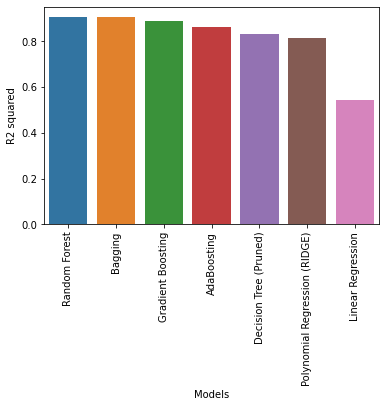

In [37]:
df.sort_values(by = 'R2 squared', ascending = False, inplace = True)
sns.barplot(x = df.index, y = df['R2 squared']);
plt.xticks(rotation = 90);

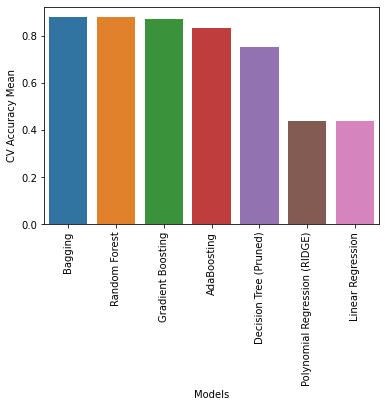

In [42]:
df.sort_values(by = 'CV Accuracy Mean', ascending = False, inplace = True)
sns.barplot(x = df.index, y = df['CV Accuracy Mean']);
plt.xticks(rotation = 90);

> From the barplots above, we get highest R2 score/ cross-validation R2 score mean for <b> Random Forest, Bagging and Gradient Boosting </b> and hence we choose 2 of these for model tuning. 

# 4. Model Tuning

> In order to improve the performance of the models, use GridSearchCV to find the best combination of hyper-parameters for the 2 models: Random Forest and Gradient Boosting.

## a. Random Forest

In [38]:
# Hyper-parameters of Model: Random Forest
model4.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Feature Importances of Model: Random Forest
pd.Series(model4.feature_importances_, x.columns ).sort_values(ascending= False)

water-cement ratio    0.394033
age                   0.377692
slag                  0.075390
superplastic          0.058119
fineagg               0.048697
coarseagg             0.029661
ash                   0.016408
dtype: float64

In [79]:
## Hyper-parameter Tuning Method: GridSearchCV (Random Forest)

from sklearn.model_selection import GridSearchCV
param_rf = {'n_estimators': [300,400,500],
           #'criterion': ['mse','mae'],
           'max_depth': [3,4,5],
           'min_samples_split': [2,3,4]}
           #'min_samples_leaf': [2,3,4],
           #'max_features': ['auto','sqrt','log2']}
gs_rf = GridSearchCV(RandomForestRegressor(random_state = 0),
                    param_grid = param_rf,
                    scoring = 'r2',
                    cv = 10,
                    n_jobs = -1)
gs_rf.fit(x_train, y_train)

print(" Best CV accuracy: {:.2f}".format(gs_rf.best_score_)) 
print(" Best parameters: {}".format(gs_rf.best_params_))
print(" Test set accuracy: {:.2f}".format(gs_rf.score(x_test, sc_y.transform(y_test))))

 Best CV accuracy: 0.83
 Best parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 500}
 Test set accuracy: 0.82


In [40]:
# Re-build Model 4: (Ensemble) Random Forest

# Step 1: Fit Model
from sklearn.ensemble import RandomForestRegressor
model4_new = RandomForestRegressor(random_state = 0,
                                max_depth = 5,
                                min_samples_split = 4,
                                n_estimators = 500)
model4_new.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred4_new = sc_y.inverse_transform(model4_new.predict(x_test))

# Step 3: Evaluate R squared Score
score4_new = r2_score(y_test, y_pred4_new)

# Step 4: Print train/test Scores and R2 score
train4_new = model4_new.score(x_train, y_train)
test4_new = model4_new.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train4_new))
print("Testing set Accuracy: {}".format(test4_new))
print("R squared: {}".format(score4_new))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold4_new = cross_val_score(model4_new, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold4))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold4_new.mean()*100.0, kfold4_new.std()*100.0))



Training set Accuracy: 0.8882879730931664
Testing set Accuracy: 0.8246253766967659
R squared: 0.8246253766967659

Estimated Accuracy mean: 79.318% 
Estimated Accuracy Standard Deviation: 10.007%


In [41]:
# Display changes in performance
df_result = pd.DataFrame({'Models': ['Random Forest (Old)',
                              'Random Forest (After GridSearchCV)'],
                   'Training Score': [train4, train4_new],
                   'Testing Score': [test4, test4_new],
                   'R2 squared' : [score4, score4_new],
                  'CV Accuracy Mean': [kfold4.mean(), kfold4_new.mean() ],
                  'CV Accuracy Std. Dev.': [kfold4.std(),kfold4_new.std() ]})
df_result.set_index('Models', inplace = True)
df_result

,Training Score,Testing Score,R2 squared,CV Accuracy Mean,CV Accuracy Std. Dev.
Models,,,,,
Random Forest (Old),0.984016,0.904633,0.904633,0.878385,0.089712
Random Forest (After GridSearchCV),0.888288,0.824625,0.824625,0.793179,0.100069


> The model does not overfit anymore as compared to before and has R2 score mean as 0.79 with standard deviation of about 0.10

## b. Bagging

In [43]:
# Hyper-parameters of Model: Bagging
model5.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 15,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(max_depth=15, random_state=0),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [45]:
## Hyper-parameter Tuning Method: GridSearchCV (Random Forest)

from sklearn.model_selection import GridSearchCV
param_b = {'n_estimators': [100,200,300,400,500],
           #'criterion': ['mse','mae'],
           'base_estimator__max_depth': [10,15,20],
           'base_estimator__min_samples_split': [2,3,4]}
           #'min_samples_leaf': [2,3,4],
           #'max_features': ['auto','sqrt','log2']}
gs_b = GridSearchCV(BaggingRegressor(base_estimator = model3_dTree_p,
                                     random_state = 0),
                    param_grid = param_b,
                    scoring = 'r2',
                    cv = 10,
                    n_jobs = -1)
gs_b.fit(x_train, y_train)

print(" Best CV accuracy: {:.2f}".format(gs_b.best_score_)) 
print(" Best parameters: {}".format(gs_b.best_params_))
print(" Test set accuracy: {:.2f}".format(gs_b.score(x_test, sc_y.transform(y_test))))

 Best CV accuracy: 0.90
 Best parameters: {'base_estimator__max_depth': 20, 'base_estimator__min_samples_split': 2, 'n_estimators': 500}
 Test set accuracy: 0.90


In [50]:
# Re-build Model 5: (Ensemble) Bagging

# Step 1: Fit Model
model5_new = BaggingRegressor(n_estimators = 500,
                            base_estimator = DecisionTreeRegressor(random_state = 0,
                                                                  max_depth = 20,
                                                                  min_samples_split = 2),
                            random_state = 0)
model5_new.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred5_new = sc_y.inverse_transform(model5_new.predict(x_test))

# Step 3: Evaluate R squared Score
score5_new = r2_score(y_test, y_pred5_new)

# Step 4: Print train/test Scores and R2 score
train5_new = model5_new.score(x_train, y_train)
test5_new = model5_new.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train5_new))
print("Testing set Accuracy: {}".format(test5_new))
print("R squared: {}".format(score5_new))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold5_new = cross_val_score(model5_new, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold4))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold5_new.mean()*100.0, kfold5_new.std()*100.0))



Training set Accuracy: 0.9843752807862207
Testing set Accuracy: 0.9042164624696069
R squared: 0.9042164624696069

Estimated Accuracy mean: 87.719% 
Estimated Accuracy Standard Deviation: 8.877%


In [51]:
# Display changes in performance
df_result = pd.DataFrame({'Models': ['Bagging (Old)',
                              'Bagging (After GridSearchCV)'],
                   'Training Score': [train5, train5_new],
                   'Testing Score': [test5, test5_new],
                   'R2 squared' : [score5, score5_new],
                  'CV Accuracy Mean': [kfold5.mean(), kfold5_new.mean() ],
                  'CV Accuracy Std. Dev.': [kfold5.std(),kfold5_new.std() ]})
df_result.set_index('Models', inplace = True)
df_result

,Training Score,Testing Score,R2 squared,CV Accuracy Mean,CV Accuracy Std. Dev.
Models,,,,,
Bagging (Old),0.983793,0.904482,0.904482,0.878706,0.089435
Bagging (After GridSearchCV),0.984375,0.904216,0.904216,0.877188,0.088765


> The model shows same performance after GridSearchCV.

## c. Gradient Boosting

In [82]:
# Hyper-parameters of Model: Gradient Boosting
model7.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [83]:
# Feature Importances of Model: Gradient Boosting
pd.Series(model7.feature_importances_, x.columns ).sort_values(ascending= False)

age                   0.396874
water-cement ratio    0.382938
slag                  0.085971
superplastic          0.072091
fineagg               0.041965
coarseagg             0.013130
ash                   0.007030
dtype: float64

In [84]:
## Hyper-parameter Tuning Method: GridSearchCV (Gradient Boosting)

from sklearn.model_selection import GridSearchCV
param_gb = {'n_estimators': [100,200,300,400,500],
           'max_depth': [3,4,5,6]}
           #'min_samples_split': [2,3,4],
           #'min_samples_leaf': [2,3,4],
           #'max_features': ['auto','sqrt','log2']}
gs_gb = GridSearchCV(GradientBoostingRegressor(random_state = 0),
                    param_grid = param_gb,
                    scoring = 'r2',
                    cv = 10,
                    n_jobs = -1)
gs_gb.fit(x_train, y_train)

print(" Best CV accuracy: {:.2f}".format(gs_gb.best_score_)) 
print(" Best parameters: {}".format(gs_gb.best_params_))
print(" Test set accuracy: {:.2f}".format(gs_gb.score(x_test, sc_y.transform(y_test))))

 Best CV accuracy: 0.93
 Best parameters: {'max_depth': 3, 'n_estimators': 500}
 Test set accuracy: 0.93


In [85]:
## Re-build Model 7: (Ensemble)  Gradient Boosting

# Step 1: Fit Model
from sklearn.ensemble import GradientBoostingRegressor
model7_new  = GradientBoostingRegressor(n_estimators = 500,
                                        max_depth = 3,
                                    random_state = 0)
model7_new.fit(x_train, y_train)

# Step 2: Predict test set results
y_pred7_new = sc_y.inverse_transform(model7_new.predict(x_test))

# Step 3: Evaluate R squared Score
score7_new = r2_score(y_test, y_pred7_new)

# Step 4: Print train/test Scores and R2 score
train7_new = model7_new.score(x_train, y_train)
test7_new = model7_new.score(x_test, sc_y.transform(y_test))
print("Training set Accuracy: {}".format(train7_new))
print("\nTesting set Accuracy: {}".format(test7_new))
print("\nR squared: {}".format(score7_new))

# Step 5: Evaluate & print Cross-Validation Score Mean and Standard Deviation
kfold7_new = cross_val_score(model7_new, x_train, y_train,
                         cv = kfold, scoring='r2',
                        n_jobs = -1)
#print("\nCV Result: {}".format(kfold7))
print("\nEstimated Accuracy mean: {:.3f}% \nEstimated Accuracy Standard Deviation: {:.3f}%".format(kfold7_new.mean()*100.0, kfold7_new.std()*100.0))



Training set Accuracy: 0.986378432723719

Testing set Accuracy: 0.9253558558054045

R squared: 0.9253558558054045

Estimated Accuracy mean: 90.932% 
Estimated Accuracy Standard Deviation: 6.806%


In [86]:
# Display changes in performance
df_result = pd.DataFrame({'Models': ['Gradient Boosting (Old)',
                              'Gradient Boosting (After GridSearchCV)'],
                   'Training Score': [train7, train7_new],
                   'Testing Score': [test7, test7_new],
                   'R2 squared' : [score7, score7_new],
                  'CV Accuracy Mean': [kfold7.mean(), kfold7_new.mean() ],
                  'CV Accuracy Std. Dev.': [kfold7.std(),kfold7_new.std() ]})
df_result.set_index('Models', inplace = True)
df_result

,Training Score,Testing Score,R2 squared,CV Accuracy Mean,CV Accuracy Std. Dev.
Models,,,,,
Gradient Boosting (Old),0.946664,0.889762,0.889762,0.872392,0.071218
Gradient Boosting (After GridSearchCV),0.986378,0.925356,0.925356,0.909324,0.068064


> After tuning hyper-parameters using GridSearchCV, both Training and Testing score are above 0.90 and the model has R2 score mean as 0.90 with standard deviation of about 0.06.

<b> In the end, we choose Gradient Boosting algorithm for the final model with higher CV accuracy mean. </b>

# 5. Final Model

In [53]:
# Create a copy of dataset
X = x
Y = y

In [54]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [55]:
# Build Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

pipeline = Pipeline([('scaler',StandardScaler()),
                     #('pca', PCA(n_components = 2)),
                     ('gbr', GradientBoostingRegressor(n_estimators = 500,
                                                       max_depth = 3,
                                                       random_state = 0))])

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr',
                 GradientBoostingRegressor(n_estimators=500, random_state=0))])

In [56]:
Y_predict = pipeline.predict(X_test)

In [57]:
model_score = pipeline.score(X_test, Y_test)
print(model_score)

0.9252918921833126


# Conclusion:

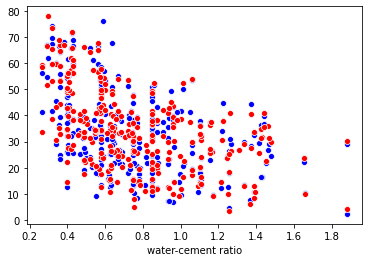

In [59]:
## Visualization of predicted vs. original data
# 'water-cement ratio' vs. 'strength'
sns.scatterplot(x = X_test['water-cement ratio'], y = Y_test.flatten(), color = 'blue');
sns.scatterplot(x = X_test['water-cement ratio'], y = Y_predict.flatten(), color = 'red');

> The <b> blue dots </b> represent the target values of actual test data whereas the <b> red dots </b> represent the predicted values of target variable for the same test data by the Gradient Boosting regression algorithm. 

<br> The graph above <b> verify the trend </b> observed in the dataset before model training, i.e. 
- decrease in 'water-cement ratio' increases 'strength'

<br> Hence, we get the best predictions for <b>Gradient Boosting Regressor with model R2 score of about 92.5% </b> 